In [231]:
import sys
sys.path.append('/home/gift/777/refer')
from refer import REFER

data_root = '/home/gift/data/refcoco'
dataset = 'refcoco'
splitBy = 'unc'
refer = REFER(data_root, dataset, splitBy)

loading dataset refcoco into memory...
creating index...
index created.
DONE (t=5.59s)


defaultdict(<class 'int'>, {3: 41473, 2: 8159, 4: 360, 1: 2, 6: 1, 5: 5})
1. left girl
2. woman on left
3. chick on left


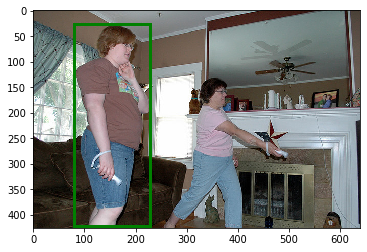

In [232]:
import matplotlib.pyplot as plt
import numpy as np
refIds = refer.getRefIds()
from collections import defaultdict
annCnt = defaultdict(int)
for refId in refIds:
    ref = refer.loadRefs(refId)[0]
    annCnt[len(ref['sentences'])] += 1
print(annCnt)
ref_id = refIds[np.random.randint(0, len(refIds))]
ref = refer.Refs[ref_id]
plt.figure()
refer.showRef(ref, seg_box='box')
plt.show()

In [4]:
ref = refer.loadRefs(refIds[0])[0]
print(ref)
img = refer.loadImgs(ref['image_id'])[0]
print(img)

{'sent_ids': [0, 1, 2], 'file_name': 'COCO_train2014_000000581857_16.jpg', 'ann_id': 1719310, 'ref_id': 0, 'image_id': 581857, 'split': 'train', 'sentences': [{'tokens': ['the', 'lady', 'with', 'the', 'blue', 'shirt'], 'raw': 'THE LADY WITH THE BLUE SHIRT', 'sent_id': 0, 'sent': 'the lady with the blue shirt'}, {'tokens': ['lady', 'with', 'back', 'to', 'us'], 'raw': 'lady w back to us', 'sent_id': 1, 'sent': 'lady with back to us'}, {'tokens': ['blue', 'shirt'], 'raw': 'blue shirt', 'sent_id': 2, 'sent': 'blue shirt'}], 'category_id': 1}
{'license': 4, 'file_name': 'COCO_train2014_000000581857.jpg', 'coco_url': 'http://mscoco.org/images/581857', 'height': 640, 'width': 427, 'date_captured': '2013-11-19 19:21:09', 'flickr_url': 'http://farm6.staticflickr.com/5125/5309665572_6b7872c76a_z.jpg', 'id': 581857}


In [105]:
import json
import skimage.io as io
import matplotlib.pyplot as plt
with open('/home/gift/777/Transformer_Captioning/eval_results/baseline_refcoco_testA.json') as f:
    results = json.load(f)

In [112]:
ids = []
predCnt = defaultdict(int)
print(len(results['imgToEval'].keys()))
cnt = 0
for id in list(results['imgToEval'].keys()):
    cap = results['imgToEval'][id]['caption']
#     if 'red' in cap or 'yellow' in cap or 'blue' in cap or 'pink' in cap or 'green' in cap:
    if 'right' in cap:
        cnt += 1
    predCnt[len(cap.split(' '))] += 1
    if results['imgToEval'][id]['CIDEr'] < 0.5:
        ids.append(id)
print(predCnt)
print(cnt)

1975
defaultdict(<class 'int'>, {3: 788, 2: 541, 4: 235, 1: 345, 7: 9, 10: 1, 6: 26, 5: 26, 8: 3, 9: 1})
390


right banana
41215
0.0
1. dude behind everyone
2. middle guy
3. man in middle


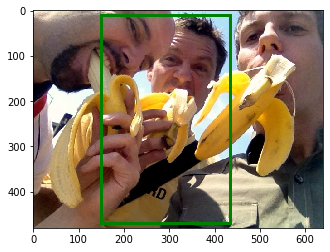

In [218]:
id = ids[25]
# print(results['imgToEval'][id])
print(results['imgToEval'][id]['caption'])
print(results['imgToEval'][id]['image_id'])
print(results['imgToEval'][id]['CIDEr'])
ref = refer.Refs[int(id)]
plt.figure()
refer.showRef(ref, seg_box='box')
plt.show()